# 📌 Fase 1. Business Understanding

## 🎯 1. Objective

El objetivo de este proyecto es **desarrollar un modelo predictivo** que permita determinar el **tipo de diabetes en pacientes** (según el código CIE-10, variable `COD_DIAG`) a partir de características clínicas clave, específicamente:  

- **Edad del paciente** (`EDAD_PACIENTE`)  
- **Dosaje de glucosa en sangre, cuantitativo** (`RESULTADO_1`)  
- **Dosaje de colesterol total en sangre** (`RESULTADO_2`)  

# 📌 Fase 2. Data Understanding

## 📥 2. Data collection

In [13]:
import pandas as pd
import numpy as np


data = pd.read_csv("data_diabetes.csv", 
                    encoding='utf-8',      # o 'latin-1' si hay caracteres especiales
                    sep=';',               # separador (por defecto es coma)
                    header=0,              # fila que contiene los nombres de columnas
                    index_col=None)        # si quieres usar una columna como índice

In [37]:
# Resumen general
data.info()
print('data.columns:',data.columns)
print('data.shape:',data.shape)
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509716 entries, 0 to 509715
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   FECHA_CORTE             509716 non-null  int64  
 1   DEPARTAMENTO            509716 non-null  object 
 2   PROVINCIA               509716 non-null  object 
 3   DISTRITO                509716 non-null  object 
 4   UBIGEO                  509716 non-null  int64  
 5   RED                     509716 non-null  object 
 6   IPRESS                  509716 non-null  object 
 7   ID_PACIENTE             509716 non-null  object 
 8   EDAD_PACIENTE           509716 non-null  int64  
 9   SEXO_PACIENTE           509716 non-null  object 
 10  EDAD_MEDICO             509716 non-null  int64  
 11  ID_MEDICO               509716 non-null  object 
 12  COD_DIAG                509716 non-null  object 
 13  DIAGNOSTICO             509716 non-null  object 
 14  AREA_HOSPITALARIA   

,FECHA_CORTE,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,RED,IPRESS,ID_PACIENTE,EDAD_PACIENTE,SEXO_PACIENTE,...,ACTIVIDAD_HOSPITALARIA,FECHA_MUESTRA,FEC_RESULTADO_1,PROCEDIMIENTO_1,RESULTADO_1,UNIDADES_1,FEC_RESULTADO_2,PROCEDIMIENTO_2,RESULTADO_2,UNIDADES_2
0,20240531,UCAYALI,CORONEL PORTILLO,MANANTAY,250107,RED ASISTENCIAL UCAYALI,CAP I MANANTAY,eJwzNDAwtDC0NDMxNzAyMzWxMAQAHqoDcA==,51,MASCULINO,...,ATENCION MEDICA AMBULATORIA,20200102,20200111,DOSAJE DE COLESTEROL TOTAL EN SANGRE COMPLETA ...,217.0,mg/dL,20200111,"DOSAJE DE GLUCOSA EN SANGRE, CUANTITATIVO (EXC...",258.0,mg/dL
1,20240531,UCAYALI,CORONEL PORTILLO,YARINACOCHA,250105,RED ASISTENCIAL UCAYALI,P.M. ALAMEDA,eJwzNDAwMjAxNTUxsbQ0NTAzMgUAHnQDbg==,48,FEMENINO,...,ATENCION MEDICA AMBULATORIA,20200102,20200111,DOSAJE DE COLESTEROL TOTAL EN SANGRE COMPLETA ...,192.0,mg/dL,20200111,"DOSAJE DE GLUCOSA EN SANGRE, CUANTITATIVO (EXC...",171.0,mg/dL
2,20240531,TACNA,TACNA,CALANA,230103,RED ASISTENCIAL TACNA,H.III DANIEL ALCIDES CARRION,eJwzNDCwMLOwMDKztDQHsszNAB+JA4w=,67,MASCULINO,...,ATENCION MEDICA AMBULATORIA,20200102,20200102,DOSAJE DE COLESTEROL TOTAL EN SANGRE COMPLETA ...,203.0,mg/dL,20200102,"DOSAJE DE GLUCOSA EN SANGRE, CUANTITATIVO (EXC...",78.0,mg/dL
3,20240531,TACNA,TACNA,TACNA,230101,RED ASISTENCIAL TACNA,CAP II OSCAR FERNANDEZ DAVILA VELEZ,eJwzNDCwNDU3Mja1MDUyMTCxMAEAHukDdA==,67,MASCULINO,...,ATENCION MEDICA AMBULATORIA,20200102,20200102,DOSAJE DE COLESTEROL TOTAL EN SANGRE COMPLETA ...,207.0,mg/dL,20200102,"DOSAJE DE GLUCOSA EN SANGRE, CUANTITATIVO (EXC...",113.0,mg/dL
4,20240531,SAN MARTIN,HUALLAGA,SAPOSOA,220401,MICRORED ASISTENCIAL TARAPOTO,P.M. SAPOSOA,eJwzNDA0szQCQgMDM2NLcxMTAB8CA3k=,59,MASCULINO,...,ATENCION MEDICA AMBULATORIA,20200102,20200102,DOSAJE DE COLESTEROL TOTAL EN SANGRE COMPLETA ...,155.0,mg/dL,20200102,"DOSAJE DE GLUCOSA EN SANGRE, CUANTITATIVO (EXC...",78.0,mg/dL
5,20240531,LA LIBERTAD,TRUJILLO,LA ESPERANZA,130105,RED ASISTENCIAL LA LIBERTAD,H.I LA ESPERANZA,eJwzNLY0tDC1sDQ1NDezNDa0MAEAH8cDiQ==,55,MASCULINO,...,ATENCION MEDICA AMBULATORIA,20200102,20200102,DOSAJE DE COLESTEROL TOTAL EN SANGRE COMPLETA ...,130.0,mg/dL,20200102,"DOSAJE DE GLUCOSA EN SANGRE, CUANTITATIVO (EXC...",149.0,mg/dL
6,20240531,LA LIBERTAD,TRUJILLO,LA ESPERANZA,130105,RED ASISTENCIAL LA LIBERTAD,H.I LA ESPERANZA,eJwzNLY0NjM3NzE2MDE1MTQxNQMAH1MDeQ==,67,MASCULINO,...,ATENCION MEDICA AMBULATORIA,20200102,20200102,DOSAJE DE COLESTEROL TOTAL EN SANGRE COMPLETA ...,221.0,mg/dL,20200102,"DOSAJE DE GLUCOSA EN SANGRE, CUANTITATIVO (EXC...",328.0,mg/dL
7,20240531,LIMA,LIMA,MIRAFLORES,150122,RED ASISTENCIAL REBAGLIATI,H.III SUAREZ-ANGAMOS,eJwzNLY0tjQ1NzYwNrU0sLA0MwQAH4gDgg==,73,FEMENINO,...,ATENCION MEDICA AMBULATORIA,20200102,20200102,DOSAJE DE COLESTEROL TOTAL EN SANGRE COMPLETA ...,152.0,mg/dL,20200102,"DOSAJE DE GLUCOSA EN SANGRE, CUANTITATIVO (EXC...",83.0,mg/dL
8,20240531,HUANUCO,HUANUCO,AMARILIS,100102,RED ASISTENCIAL HUANUCO,H.II HUANUCO,eJwzNDU0NzA0MDc0tzQ2MjM0MgQAHqEDZw==,58,FEMENINO,...,ATENCION MEDICA AMBULATORIA,20200102,20200106,DOSAJE DE COLESTEROL TOTAL EN SANGRE COMPLETA ...,194.0,mg/dL,20200106,"DOSAJE DE GLUCOSA EN SANGRE, CUANTITATIVO (EXC...",221.0,mg/dL
9,20240531,SAN MARTIN,HUALLAGA,SAPOSOA,220401,MICRORED ASISTENCIAL TARAPOTO,P.M. SAPOSOA,eJwzMrUwMjYxsjA3sTA0MDYyMAEAHzcDcA==,20,FEMENINO,...,ATENCION MEDICA AMBULATORIA,20200102,20200102,DOSAJE DE COLESTEROL TOTAL EN SANGRE COMPLETA ...,126.0,mg/dL,20200102,"DOSAJE DE GLUCOSA EN SANGRE, CUANTITATIVO (EXC...",71.0,mg/dL


## 📊 3. Descriptive analysis

### 3.1 Análisis descriptivo

In [38]:
#Resumen estadístico de todas las variables (describe()).
data.describe(include="all").T # incluye categóricas y numéricas

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
FECHA_CORTE,509716.0,NaN,NaN,NaN,20240531.0,0.0,20240531.0,20240531.0,20240531.0,20240531.0,20240531.0
DEPARTAMENTO,509716,25,LIMA,180751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PROVINCIA,509716,111,LIMA,170963,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DISTRITO,509716,227,LIMA,39651,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UBIGEO,509716.0,NaN,NaN,NaN,130985.651304,55220.28167,10101.0,110101.0,150101.0,150136.0,250107.0
RED,509716,30,RED ASISTENCIAL REBAGLIATI,75651,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IPRESS,509716,272,H.III HOSPITAL DE EMERGENCIAS GRAU,21922,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ID_PACIENTE,509716,260725,eJwzNDMwsjC2MDQzMTE1NjAwMgUAHuQDaw==,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EDAD_PACIENTE,509716.0,NaN,NaN,NaN,61.865916,13.336874,0.0,54.0,63.0,71.0,108.0
SEXO_PACIENTE,509716,2,FEMENINO,297424,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Separar los datos segú sus Tipos de variables (numéricas, categóricas). fechas se considera como cat aunque también puedes separr
numeric_data = data.select_dtypes(include=[np.number])
categor_data = data.select_dtypes(exclude=[np.number])
print ("Hay {} variables númericas y {} categóricas en la data".format(numeric_data.shape[1],categor_data.shape[1]))

NameError: name 'data' is not defined

In [1]:
# Puedes ver la Distribución de variables numéricas
numeric_data.describe().T

NameError: name 'numeric_data' is not defined

In [15]:
#Variables únicas en cada variable
categor_data.describe(include="all").T

,count,unique,top,freq
DEPARTAMENTO,509716,25,LIMA,180751
PROVINCIA,509716,111,LIMA,170963
DISTRITO,509716,227,LIMA,39651
RED,509716,30,RED ASISTENCIAL REBAGLIATI,75651
IPRESS,509716,272,H.III HOSPITAL DE EMERGENCIAS GRAU,21922
ID_PACIENTE,509716,260725,eJwzNDMwsjC2MDQzMTE1NjAwMgUAHuQDaw==,21
SEXO_PACIENTE,509716,2,FEMENINO,297424
ID_MEDICO,509716,5290,eJwzNDA1NTWwsDAwNDEwsDQ3MwEAHrkDcA==,4934
COD_DIAG,509716,57,E11.9,340278
DIAGNOSTICO,509716,57,"DIABETES MELLITUS TIPO 2, SIN MENCION DE COMPL...",340278


In [30]:
# Conteo de valores únicos en categóricas (Las posibles importantes)
for col in ['DIAGNOSTICO', 'COD_DIAG', 'AREA_HOSPITALARIA', 'ACTIVIDAD_HOSPITALARIA', 'PROCEDIMIENTO_1', 'PROCEDIMIENTO_2']:
    print(f"\n{col}:\n", data[col].value_counts())

# Conteo de la variable objetivo
#data["COD_DIAG"].value_counts()



DIAGNOSTICO:
 DIAGNOSTICO
DIABETES MELLITUS TIPO 2, SIN MENCION DE COMPLICACION                                        340278
DIABETES MELLITUS TIPO 2, CON COMPLICACIONES MULTIPLES                                        44702
DIABETES MELLITUS TIPO 2, CON COMPLICACIONES NO ESPECIFICADAS                                 25176
OTROS TRASTORNOS ESPECIFICADOS DE LA SECRECION INTERNA DEL PANCREAS                           17316
DIABETES MELLITUS, NO ESPECIFICADA, SIN MENCION DE COMPLICACION                               12401
DIABETES MELLITUS TIPO 2, CON COMPLICACIONES NEUROLOGICAS                                      9711
DIABETES MELLITUS TIPO 1, SIN MENCION DE COMPLICACION                                          9507
DIABETES MELLITUS ESPECIFICADA, SIN MENCION DE COMPLICACION                                    9248
TRASTORNOS DE LA SECRECION INTERNA DEL PANCREAS, SIN OTRA ESPECIFICACION                       8123
DIABETES MELLITUS TIPO 2, CON OTRAS COMPLICACIONES ESPECIFICADAS         

##### 📊 Clasificación de los tipos de diabetes en la data (CIE-10)

La siguiente tabla muestra los códigos **CIE-10** encontrados en la columna `COD_DIAG`, junto con su descripción y la frecuencia de aparición en el dataset:

| Código  | Descripción (CIE-10) | Frecuencia |
|---------|-----------------------|------------|
| E11.9   | Diabetes tipo 2 sin complicaciones | 340,278 |
| E11.7   | Diabetes tipo 2 con complicaciones múltiples | 44,702 |
| E11.8   | Diabetes tipo 2 con complicaciones no especificadas | 25,176 |
| E16.8   | Otros trastornos especificados de la secreción pancreática interna | 17,316 |
| E14.9   | Diabetes mellitus no especificada sin complicaciones | 12,401 |
| E11.4   | Diabetes tipo 2 con neuropatía | 9,711 |
| E10.9   | Diabetes tipo 1 sin complicaciones | 9,507 |
| E13.9   | Otras formas específicas de diabetes mellitus sin complicaciones | 9,248 |
| E16.9   | Trastorno no especificado de la secreción pancreática interna | 8,123 |
| E11.6   | Diabetes tipo 2 con pie diabético | 7,515 |
| E11.2   | Diabetes tipo 2 con enfermedad renal crónica | 4,565 |
| E13.7   | Otras formas específicas de diabetes con complicaciones múltiples | 3,882 |
| E10.7   | Diabetes tipo 1 con complicaciones múltiples | 2,917 |
| E13.2   | Otras formas específicas de diabetes con enfermedad renal crónica | 2,769 |
| E11.5   | Diabetes tipo 2 con complicaciones circulatorias periféricas | 1,762 |
| E13.8   | Otras formas específicas de diabetes con complicaciones no especificadas | 1,515 |
| E13.4   | Otras formas específicas de diabetes con neuropatía | 1,211 |
| E10.8   | Diabetes tipo 1 con complicaciones no especificadas | 1,177 |
| E10.4   | Diabetes tipo 1 con neuropatía | 499 |
| E12.8   | Diabetes debida a desnutrición con complicaciones no especificadas | 496 |
| E10.6   | Diabetes tipo 1 con pie diabético | 457 |
| E13.5   | Otras formas específicas de diabetes con complicaciones circulatorias periféricas | 454 |
| E14.7   | Diabetes no especificada con complicaciones múltiples | 425 |
| E13.6   | Otras formas específicas de diabetes con pie diabético | 352 |
| E10.5   | Diabetes tipo 1 con complicaciones circulatorias periféricas | 287 |
| E10.2   | Diabetes tipo 1 con enfermedad renal crónica | 271 |
| E12.9   | Diabetes debida a desnutrición sin complicaciones | 257 |
| E16.2   | Hipoglucemia no especificada | 256 |
| E11.3   | Diabetes tipo 2 con complicaciones oftálmicas | 246 |
| E12.7   | Diabetes debida a desnutrición con complicaciones múltiples | 241 |
| E14.8   | Diabetes no especificada con complicaciones no especificadas | 227 |
| E14.6   | Diabetes no especificada con pie diabético | 187 |
| E14.4   | Diabetes no especificada con neuropatía | 185 |
| E14.2   | Diabetes no especificada con enfermedad renal crónica | 162 |
| E12.4   | Diabetes debida a desnutrición con neuropatía | 152 |
| E11.0   | Diabetes tipo 2 con coma | 141 |
| E14.5   | Diabetes no especificada con complicaciones circulatorias periféricas | 100 |
| E12.5   | Diabetes debida a desnutrición con complicaciones circulatorias periféricas | 75 |
| E12.3   | Diabetes debida a desnutrición con complicaciones oftálmicas | 54 |
| E12.6   | Diabetes debida a desnutrición con pie diabético | 54 |
| E11.1   | Diabetes tipo 2 con cetoacidosis | 54 |
| E10.3   | Diabetes tipo 1 con complicaciones oftálmicas | 50 |
| E13.3   | Otras formas específicas de diabetes con complicaciones oftálmicas | 43 |
| E16.1   | Hipoglucemia inducida por fármacos | 42 |
| E14.0   | Diabetes no especificada con coma | 30 |
| E16.0   | Hipoglucemia inducida por insulina | 28 |
| E12.2   | Diabetes debida a desnutrición con enfermedad renal crónica | 27 |
| E14.3   | Diabetes no especificada con complicaciones oftálmicas | 25 |
| E10.1   | Diabetes tipo 1 con cetoacidosis | 15 |
| E12.1   | Diabetes debida a desnutrición con cetoacidosis | 13 |
| E14.1   | Diabetes no especificada con cetoacidosis | 9 |
| E13.1   | Otras formas específicas de diabetes con cetoacidosis | 9 |
| E10.0   | Diabetes tipo 1 con coma | 6 |
| E16.3   | Hipoglucemia posprandial | 5 |
| E12.0   | Diabetes debida a desnutrición con coma | 4 |
| E13.0   | Otras formas específicas de diabetes con coma | 2 |
| E11.91  | Diabetes tipo 2 con complicación no especificada | 1 |

---

### 3.2 Análisis descriptivo (gráficos)

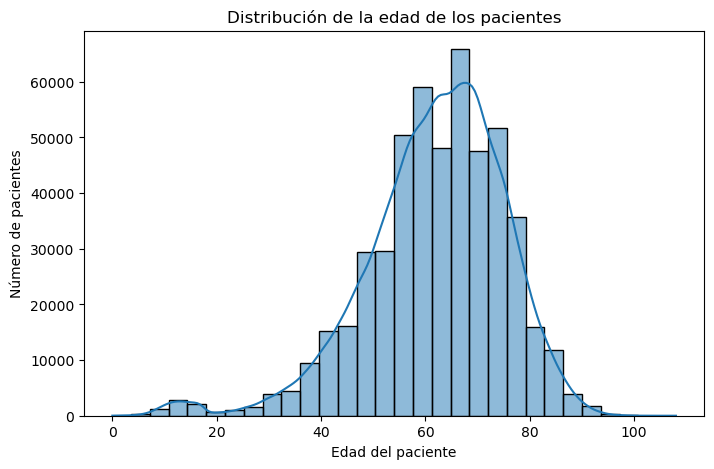

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de la edad de los pacientes
plt.figure(figsize=(8,5))
sns.histplot(data['EDAD_PACIENTE'], bins=30, kde=True)
plt.title("Distribución de la edad de los pacientes")
plt.xlabel("Edad del paciente")
plt.ylabel("Número de pacientes")
plt.show()

👉 El gráfico muestra la distribución de las edades de los pacientes 🧑‍🤝‍🧑📊. La mayoría de los pacientes tienen edades entre 50 y 70 años 🎂, lo que indica que la diabetes es más frecuente en personas adultas y adultas mayores. Se observa un número menor de pacientes jóvenes y niños 👶🧒, mientras que casi no hay casos en edades muy avanzadas (más de 90 años) 👵. En resumen, la enfermedad se concentra sobre todo en la población adulta.

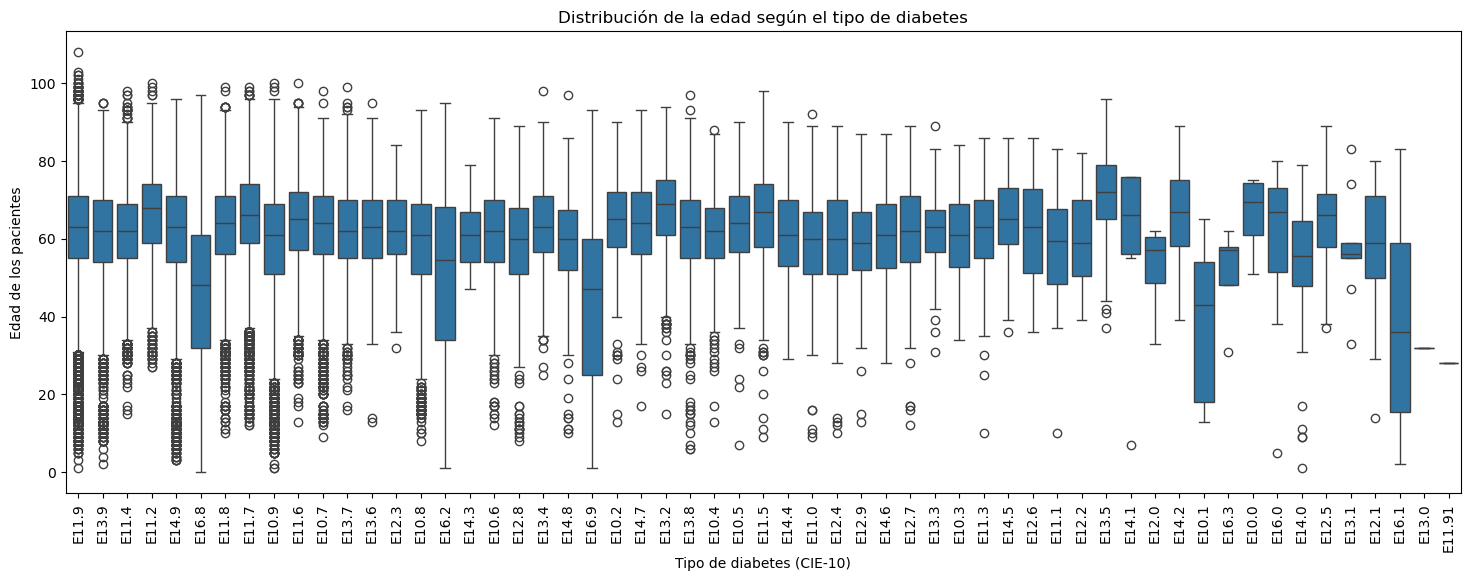

In [20]:
# Relación entre Edad y Tipo de Diabetes
plt.figure(figsize=(18, 6))  # <-- ajusta ancho y alto
sns.boxplot(x="COD_DIAG", y="EDAD_PACIENTE", data=data)
plt.xlabel("Tipo de diabetes (CIE-10)")
plt.ylabel("Edad de los pacientes")
plt.title("Distribución de la edad según el tipo de diabetes")
plt.xticks(rotation=90)  # <-- rota etiquetas para que no se encimen
plt.show()

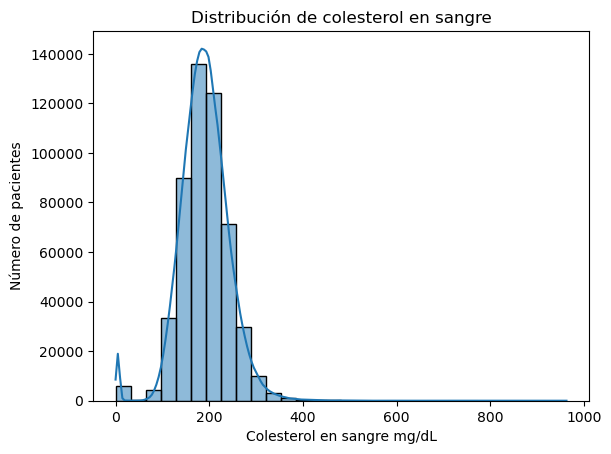

In [34]:
# Distribución de Colesterol (RESULTADO_1)
sns.histplot(data['RESULTADO_1'], bins=30, kde=True)
plt.xlabel("Colesterol en sangre mg/dL")
plt.ylabel("Número de pacientes")
plt.title("Distribución de colesterol en sangre")
plt.show()

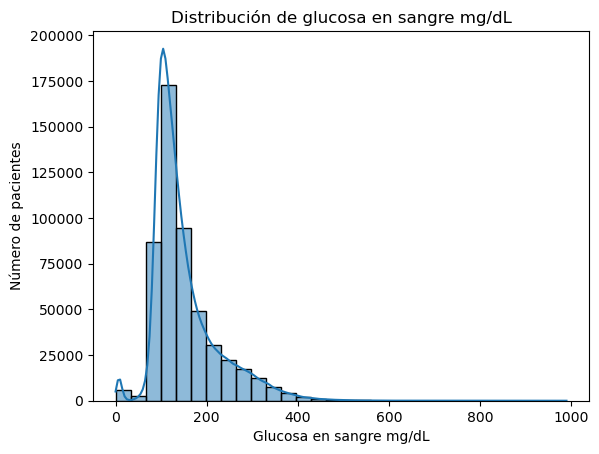

In [35]:
# Distribución de Glucosa (RESULTADO_2)
sns.histplot(data['RESULTADO_2'], bins=30, kde=True)
plt.xlabel("Glucosa en sangre mg/dL")
plt.ylabel("Número de pacientes")
plt.title("Distribución de glucosa en sangre mg/dL")
plt.show()

### 3.3 Análisis exploratorio (con estadísticas): Correlaciones y cruces de variables

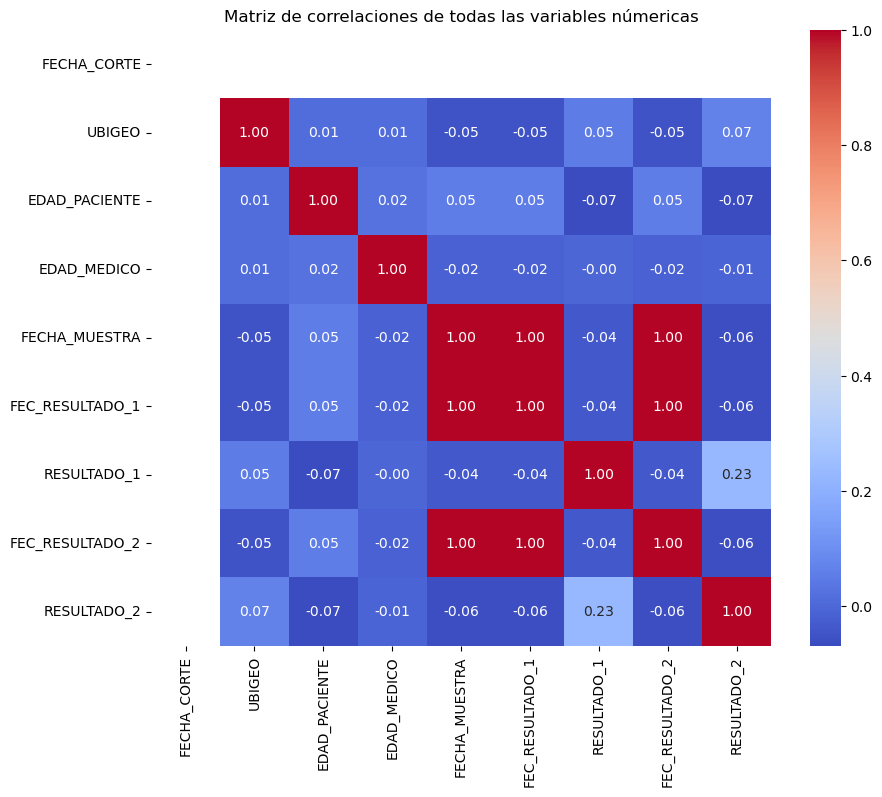

In [27]:
# Correlaciones de todas las variables númericas
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlaciones de todas las variables númericas")
plt.show()

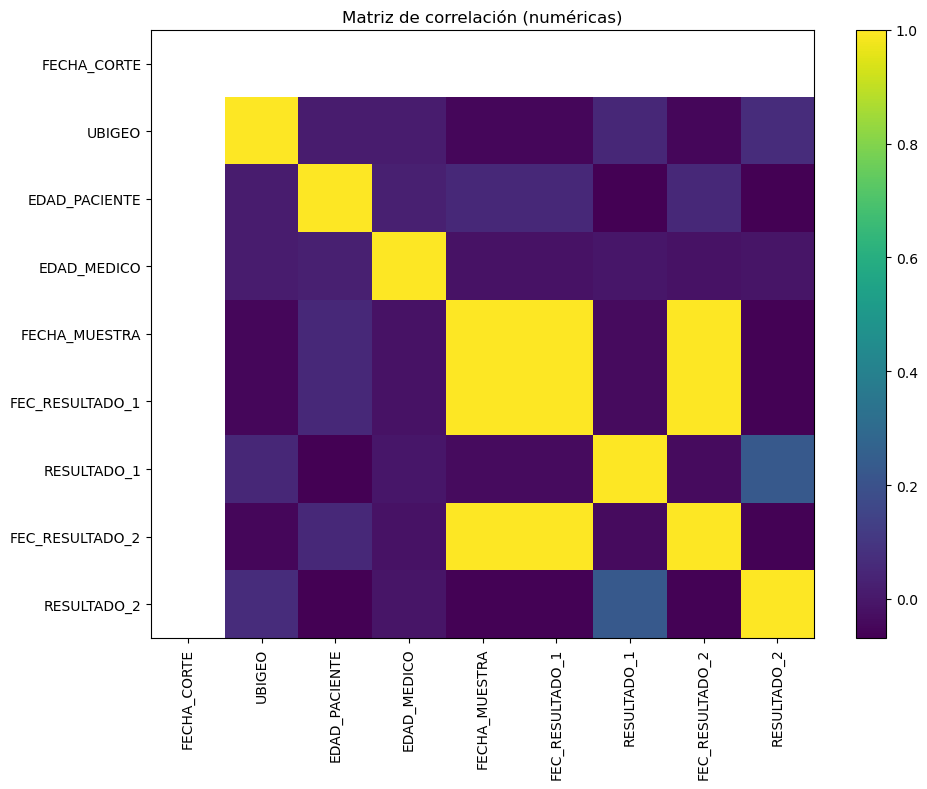

In [28]:
# Correlaciones numéricas (heatmap)
num_cols = data.select_dtypes(include=['int64','float64']).columns
corr = data[num_cols].corr()
plt.figure(figsize=(10,8))
im = plt.imshow(corr, interpolation='nearest', aspect='auto')
plt.title('Matriz de correlación (numéricas)')
plt.colorbar(im)
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.tight_layout()
plt.show()

##### Resultados (RESULTADO_1 y RESULTADO_2)
Entre ellos hay una correlación positiva débil (0.23), lo que significa que glucosa y colesterol tienen cierta relación, pero no muy fuerte.

### 3.4 Diagnóstico de calidad inicial

In [29]:
# Valores faltantes
print(data.isnull().sum())

FECHA_CORTE               0
DEPARTAMENTO              0
PROVINCIA                 0
DISTRITO                  0
UBIGEO                    0
RED                       0
IPRESS                    0
ID_PACIENTE               0
EDAD_PACIENTE             0
SEXO_PACIENTE             0
EDAD_MEDICO               0
ID_MEDICO                 0
COD_DIAG                  0
DIAGNOSTICO               0
AREA_HOSPITALARIA         0
SERVICIO_HOSPITALARIO     0
ACTIVIDAD_HOSPITALARIA    0
FECHA_MUESTRA             0
FEC_RESULTADO_1           0
PROCEDIMIENTO_1           0
RESULTADO_1               0
UNIDADES_1                0
FEC_RESULTADO_2           0
PROCEDIMIENTO_2           0
RESULTADO_2               0
UNIDADES_2                0
dtype: int64


In [40]:
# Posibles inconsistencias
print("Mínimo y máximo edad:", data['EDAD_PACIENTE'].min(), data['EDAD_PACIENTE'].max())
print("Mínimo y máximo de valores de colesterol:", data['RESULTADO_1'].min(), data['RESULTADO_1'].max())
print("Mínimo y máximo de valores de glucosa:", data['RESULTADO_2'].min(), data['RESULTADO_2'].max())

Mínimo y máximo edad: 0 108
Mínimo y máximo de valores de colesterol: 0.0 963.0
Mínimo y máximo de valores de glucosa: 0.0 989.0


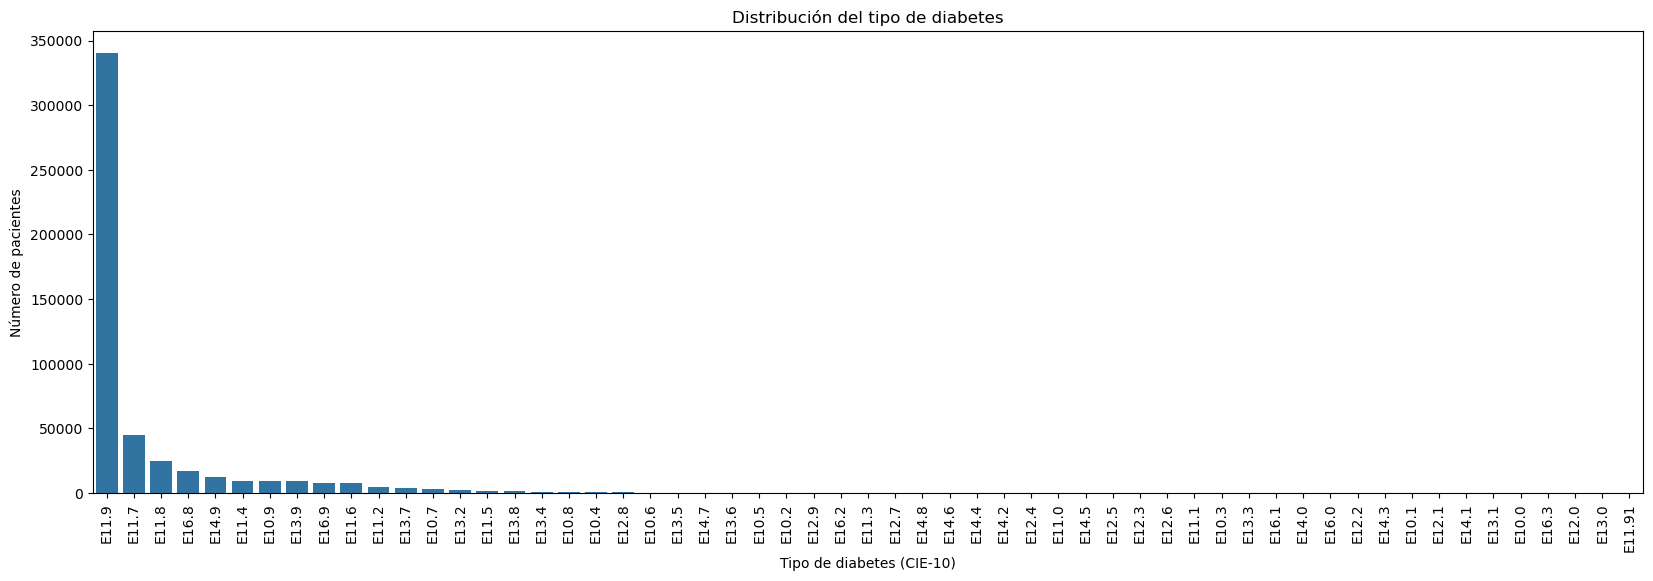

In [43]:
# Distribución del tipo de diabetes
plt.figure(figsize=(20, 6))  # <-- más ancho
sns.countplot(x="COD_DIAG", data=data, order=data["COD_DIAG"].value_counts().index)
plt.xlabel("Tipo de diabetes (CIE-10)")
plt.ylabel("Número de pacientes")
plt.title("Distribución del tipo de diabetes")
plt.xticks(rotation=90)  # <-- etiquetas giradas para que se lean mejor
plt.show()

In [44]:
#Valores faltantes: identificar y cuantificar (df.isnull().sum()).
na_counts = data.isna().sum().sort_values(ascending=False)
na_pct = (na_counts/len(data)*100).round(2)
quality_missing = pd.DataFrame({'missing': na_counts, 'missing_%': na_pct})
display(quality_missing)

,missing,missing_%
FECHA_CORTE,0,0.0
DEPARTAMENTO,0,0.0
RESULTADO_2,0,0.0
PROCEDIMIENTO_2,0,0.0
FEC_RESULTADO_2,0,0.0
UNIDADES_1,0,0.0
RESULTADO_1,0,0.0
PROCEDIMIENTO_1,0,0.0
FEC_RESULTADO_1,0,0.0
FECHA_MUESTRA,0,0.0


In [14]:
# Verificar si existen datos duplicados
dup_keys = data.duplicated(subset=['ID_PACIENTE'])
print('Registros potencialmente duplicados:', dup_keys.sum())

# Contar cuántas veces aparece cada paciente
conteo_pacientes = data['ID_PACIENTE'].value_counts()

# Filtrar solo los que están repetidos (más de 1 vez)
pacientes_repetidos = conteo_pacientes[conteo_pacientes > 1]

print("Número de pacientes repetidos:", pacientes_repetidos.shape[0])
print("\nEjemplo de pacientes repetidos y su frecuencia:")
print(pacientes_repetidos.head(100))  # muestra los primeros 100

Registros potencialmente duplicados: 60155
Número de pacientes repetidos: 41066

Ejemplo de pacientes repetidos y su frecuencia:
ID_PACIENTE
eJwzNLE0NTQytTAwtjAxMzY1swQAH0EDgA==    10
eJwzNDM2MTI1NTcwNTMxNjM0MgQAHwMDbg==    10
eJwzNDMxMbcwszQzNDI1MzU1MAEAH6wDgA==    10
eJwzNDMxMzYwNTYxMzWzMDQ3MwQAHycDeQ==    10
eJwzNDE3tjQ2tjA0MzUwNLM0NwMAH1cDgA==     9
                                        ..
eJwzNLE0MDU2MrU0NDY1NLM0MAAAHwoDcA==     7
eJwzNDMwtTA1MDU2sjA0N7M0MwEAHx0DfQ==     7
eJwzNDQ0N7YwNTM3MTK3NDMyMgUAHzgDfQ==     7
eJwzNDAxNTc2NzE3MLEwMjUzNgMAHw8DeQ==     7
eJwzNDAzNrIwMTA2szC2NDIyMgUAHtUDcQ==     7
Name: count, Length: 100, dtype: int64
